## Introduction

This Jupyter Notebook is to cover the assignment for PatientIQ.  The assignment utilizes a Kaggle data set found at
https://www.kaggle.com/rounakbanik/the-movies-dataset.  I will be performing an exploratory data analysis of the dataset.
In order to prepare a 5- to 10-minute presentation on my findings about the dataset and what we know about movie trends.

### Problem:

In this scenario I am a movie scheduler. My colleague, Zoe,
wants me to optimize the scheduling of movies to grow revenue. Zoe has collected the sales data over the years and would
like my help to determine if there is a change in types of movies that get audiences excited.



#### 1. Import and Clean Data
The two files used for this exercise will be the `movies_metadata.csv` and `ratings.csv`.

In [7]:
import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# file names and relative path
path = './data/'
filename_1 = 'movies_metadata.csv'
filename_2 = 'ratings_small.csv' #ratings small is used for the sake of making sure the notebook runs. Initially I used the ratings.csv however the file is too large to be used with Git.

#import data
meta_data = pd.read_csv(path+filename_1, low_memory=False)
ratings = pd.read_csv(path+filename_2)

Check first few rows of each data set.

In [9]:
meta_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [11]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


When looking at the data sets, the 'movieId' feature in the ratings data set and the 'id' feature in the meta data data set appear to be linked. Another thing that is apparent is that the 'genres' formatted so they are in dictionaries. For this EDA. I will be



In [12]:
id_check = [True if id in ratings.movieId else False for id in meta_data.id]
id_check.count(True)

0

This shows that the movieId and id are not directly related. I will now look into links data set to find a correlation between the two datasets.


In [13]:
links = pd.read_csv(path+'links.csv')
print(links.head())
print('\n')
links.info()

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In the 'links.csv' file it creates links for the features imdbID and movieID. This will enable me to link the two data sets.  The only change that needs to happen is that there are the character 'tt' in front of every imdbId in the meta_data data set. In the next cell, I wil be checking to see if the links are valid and reformatting the imdbId's to remove the tt and zeros before the id number.

In [14]:
#This shows that every movieId in ratings.csv is represented in links.csv
id_ratings_check = [True if id in ratings.movieId else False for id in links.movieId]
print(id_ratings_check.count(True))
print(links.movieId.shape)

20467
(45843,)


In [15]:

#removes the 'tt' and changes string to integer which will remove any zeros in front of the id.
meta_data.imdb_id = [str(imdbid).replace('tt','') for imdbid in meta_data.imdb_id]
meta_data.imdb_id = [0 if id == 'nan' else int(id) for id in meta_data.imdb_id]

meta_data.shape



(45466, 24)

This shows that there are 377 movies in the links data set that are not in the meta_data.  I will need to drop the excess data in the links data set in order to merge the two data sets. I will also drop all movies without ids in either the links, meta_data, and ratings data sets as they will not be able to be linked.

In [16]:
links = links[links['imdbId'].isin(meta_data['imdb_id'])]

links.shape

(45353, 3)

There is still a size discrepancy between the data sets which indicates that there are movies in the meta_data set that do not have links and will not be able to be used for this analysis

In [17]:
meta_data = meta_data[meta_data['imdb_id'].isin(links['imdbId'])]
meta_data.shape

(45383, 24)

There are still more movies in meta_data then in the links data set. This means that there are 30 duplicate movies in the data set.

In [18]:
meta_data.drop_duplicates(subset='imdb_id', inplace=True)
meta_data.shape

(45353, 24)

Now that there is a clear link between the ratings data set and the meta_data data set, and they are the same size. I can add the movieIds to the meta_data data set.

In [19]:
meta_data.sort_values(by= 'imdb_id', inplace=True, ascending=True)
links.sort_values(by='imdbId', inplace=True, ascending= True)
combined = pandas.concat([meta_data, links], axis=1)
#drop duplicate column
combined.drop(columns='imdb_id', inplace= True)
combined.sort_values(by='movieId', inplace=True)
combined.set_index('movieId', inplace=True)
combined.head()

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,imdbId,tmdbId
movieId,,,,,,,,,,,,,,,,,,,,,
1.0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,114709.0,862.0
2.0,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,113497.0,8844.0
3.0,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,113228.0,15602.0
4.0,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,...,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,114885.0,31357.0
5.0,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,113041.0,11862.0


Now that there is a clear link between the ratings data set and the meta_data data set. I can join the two data sets to make analysis easier. In order to do this I will need to get the average rating for each movie. Note this bit of code takes about two hours to run. I have saved all averaged rating in the avg_ratings.csv file for speed of use. A possible future enhancement would be to do further digging into this data set and the trends each reviewer has.


In [20]:


#counter = 0
#percent = 0
#avg_rating = pd.DataFrame(columns=['movieId', 'avg_rating'])
#for id in ratings.movieId.unique():
#    avg_rating.loc[len(avg_rating.index)] = [id, ratings[ratings['movieId'] == id]['rating'].mean()]
#     counter += 1
#     if counter % (ratings.movieId.unique().shape[0] // 10) == 0:
#         percent += 10
#         print(f'{percent}% of movies have been processed.')
#
#avg_rating.to_csv(path+'avg_rating.csv')

In [21]:
# Import averaged review data, and review first few lines.

avg_ratings = pd.read_csv(path+'avg_rating.csv')
avg_ratings.drop(columns='Unnamed: 0', inplace= True)

# Need to sort ratings by id number so it will match the records i
avg_ratings.sort_values(by='movieId', inplace=True)
avg_ratings.head()

,movieId,avg_rating
183,1.0,3.888157
1167,2.0,3.236953
1896,3.0,3.175550
3083,4.0,2.875713
27,5.0,3.079565


Now that the ids for the movies are in the combined dataframe and the ratings have been averaged with their respective ids. I can now add the avg ratings to the combined dataframe.  However as shown before there are more ratings then identifiable movies and will need to remove the ratings that will not corespond with a movie in the meta_data set.


In [22]:
avg_ratings = avg_ratings[avg_ratings['movieId'].isin(links['movieId'])]
avg_ratings.set_index('movieId', inplace=True)
avg_ratings.head()

,avg_rating
movieId,
1.0,3.888157
2.0,3.236953
3.0,3.175550
4.0,2.875713
5.0,3.079565


In [23]:
combined2 = pd.concat([combined, avg_ratings], axis=1)
combined2.shape

(45841, 26)

Now that the movies and their ratings are together in a single data set we can move on to looking deeper into the data.



#### 2. Analyzing Movies By Genre and Reception (ratings and revenue)
Most movies do not fall into one specific category but often times contain multiple genres. In order to look deeper into the movies I will need to separate the genres.  The genres feature in the data set is made up of dictionaries. This piece of code takes the genres and puts them into lists.

In [24]:
genres = []
for str_genre in combined2['genres']:
    combine = []
    if str(str_genre) != 'nan':
        string_2 = str_genre.replace('[', '').replace(']', '')
        string_2 = string_2.replace('}', '')
        ls = string_2.split(',')
        for i in range(0,len(ls)):
            if i % 2 != 0 and i != 0:
                combine.append(ls[i].replace(''' 'name': ''', '').replace("'", ''))
        genres.append(combine)
    else:
        combine = ['None']
        genres.append(combine)
# set the genres column to the new reformatted
combined2['genres'] = genres

Lets now look at the top ten highest grossing movies in the data set.

In [25]:
combined2.sort_values(by='revenue', ascending= False)[['title','revenue', 'genres', 'avg_rating']].head(10)



,title,revenue,genres,avg_rating
movieId,,,,
72653.0,Avatar,2.787965e+09,"[Action, Adventure, Fantasy, Science Fiction]",2.500000
122033.0,Star Wars: The Force Awakens,2.068224e+09,"[Action, Adventure, Science Fiction, Fantasy]",3.250000
1697.0,Titanic,1.845034e+09,"[Drama, Romance, Thriller]",2.384615
89215.0,The Avengers,1.519558e+09,"[Science Fiction, Action, Adventure]",3.333333
116568.0,Jurassic World,1.513529e+09,"[Action, Adventure, Science Fiction, Thriller]",3.000000
129640.0,Furious 7,1.506249e+09,[Action],3.500000
122039.0,Avengers: Age of Ultron,1.405404e+09,"[Action, Adventure, Science Fiction]",3.100000
87636.0,Harry Potter and the Deathly Hallows: Part 2,1.342000e+09,"[Family, Fantasy, Adventure]",2.964286
105926.0,Frozen,1.274219e+09,"[Animation, Adventure, Family]",1.700000


As you can see of the top ten highest grossing movies, all but two are action or adventure movies.  Another thing to note about this list is that the average rating for these movies is 2.65 stars out of five. When compared with the top ten rated movies (listed below) who grossed over 100 million dollars, there is more diversity within the genres, albeit 5 of the top ten rated movies are action and adventure movies. However, thrillers and dramatic movies are much more represented.

In [26]:
combined2[combined2['revenue'] > 100_000_000].sort_values(by= 'avg_rating', ascending=False)[['title','revenue', 'genres', 'avg_rating']].head(10)

,title,revenue,genres,avg_rating
movieId,,,,
134633.0,Suicide Squad,745600054.0,"[Action, Adventure, Crime, Fantasy, Science Fi...",5.000000
136992.0,The Man from U.N.C.L.E.,108145109.0,"[Comedy, Action, Adventure]",5.000000
157931.0,Alice Through the Looking Glass,299370084.0,"[Family, Fantasy]",5.000000
122068.0,X-Men: Apocalypse,543934787.0,[Science Fiction],5.000000
167510.0,The Boss Baby,498814908.0,"[Animation, Comedy, Family]",5.000000
134661.0,Independence Day: Resurgence,389681935.0,"[Action, Adventure, Science Fiction]",4.500000
91007.0,The Bourne Legacy,276572938.0,"[Action, Thriller]",4.400000
157585.0,The Shallows,119100758.0,"[Horror, Drama, Thriller]",4.333333
102495.0,Elysium,286140700.0,"[Science Fiction, Action, Drama, Thriller]",4.333333


In [27]:
movies= combined2[combined2['revenue'] > 9_900_000]

movies['genres'].value_counts().head(15)


[Comedy]                     306
[Drama]                      244
[Drama, Romance]             129
[Comedy, Romance]            128
[Comedy, Drama, Romance]     103
[Comedy, Drama]               84
[Horror, Thriller]            79
[Horror]                      53
[Drama, Thriller]             49
[Comedy, Family]              45
[Action, Thriller]            45
[Action, Crime, Thriller]     41
[Action, Comedy]              39
[Drama, History]              37
[Crime, Drama, Thriller]      35
Name: genres, dtype: int64

This table shows the most common genres that drive the most revenue to theaters. Note how Comedy genre listed 6 times in the 15 most common genre combinations.  Romance and Thriller are also featured heavily which will need further investigation.

In [28]:
# One thins to note is that the release date column is not formatted as a datetime object. The following piece of code will change the type of data in  that column.
import datetime as dt
import matplotlib.dates as mdates
#need to change movies relaes date to datetime object. curently a string.

movies['release_date'] = pd.to_datetime(movies['release_date'],format='%Y-%m-%d')

C:\Users\Bermonster\AppData\Local\Temp\ipykernel_23056\968140691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['release_date'] = pd.to_datetime(movies['release_date'],format='%Y-%m-%d')


Lets look graphically at this data.  In the graphs bellow I have limited the movies to ones that have made over 9.9 million dollars at the box office. This limit comes the list of top grossing distributors that at a minimum averaged a gross revenue of 9.9 million per movie(https://www.the-numbers.com/market/).  I will also be looking the genres to the top ten individual genres in this data set, which are: Comedy, Drama, Romance, Horror, Thriller, Family, Action, Crime, Animation, and History (shown in the above table).


In [29]:
#Create individual dataframes for each genre

Family = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Family' in movies['genres'][i]:
        Family.loc[len(Family)] = movies.loc[i]

Comedy = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Comedy' in movies['genres'][i]:
        Comedy.loc[len(Comedy)] = movies.loc[i]

Romance = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Romance' in movies['genres'][i]:
        Romance.loc[len(Romance)] = movies.loc[i]

Drama = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Drama' in movies['genres'][i]:
        Drama.loc[len(Drama)] = movies.loc[i]

Horror = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Horror' in movies['genres'][i]:
        Horror.loc[len(Horror)] = movies.loc[i]

Thriller = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Thriller' in movies['genres'][i]:
        Thriller.loc[len(Thriller)] = movies.loc[i]

Action = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Action' in movies['genres'][i]:
        Action.loc[len(Action)] = movies.loc[i]

Crime = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Crime' in movies['genres'][i]:
        Crime.loc[len(Crime)] = movies.loc[i]

Animation = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'Animation' in movies['genres'][i]:
        Animation.loc[len(Animation)] = movies.loc[i]

History = pd.DataFrame(columns=movies.columns)

for i in movies.index.values.tolist():
    if 'History' in movies['genres'][i]:
        History.loc[len(History)] = movies.loc[i]

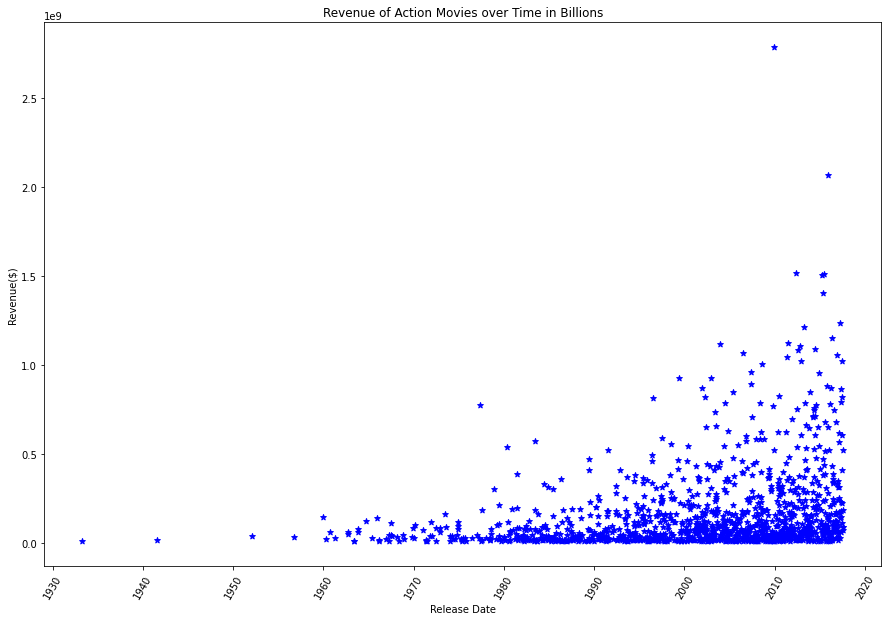

<Figure size 432x288 with 0 Axes>

In [30]:
def graph_data(x,y,color, title):
    plt.figure(figsize=(15,10))
    plt.scatter(x, y, marker='*', color= color)
    plt.xlabel('Release Date')
    plt.xticks(rotation=60)

    plt.ylabel('Revenue($)')

    plt.title(title)

    plt.show()
    plt.savefig('./imgs/'+title+'.png', dpi= 400)

x = Action.release_date
y = Action.revenue
color = 'b'
title = 'Revenue of Action Movies over Time in Billions'
graph_data(x,y,color,title)

This graph shows the revenue generated from action movies over time. This graph exemplifies how this genre has dominated the box offices, with some of the highest grossing movies of all time, inlcuding two movies that grossed more than 2 billion dollars. The action genre is also showing tremendous growth as early distribution of revenue was centered around 500 million dollars, while now the distribution of revenues is far closer to a billion dollars per movie.

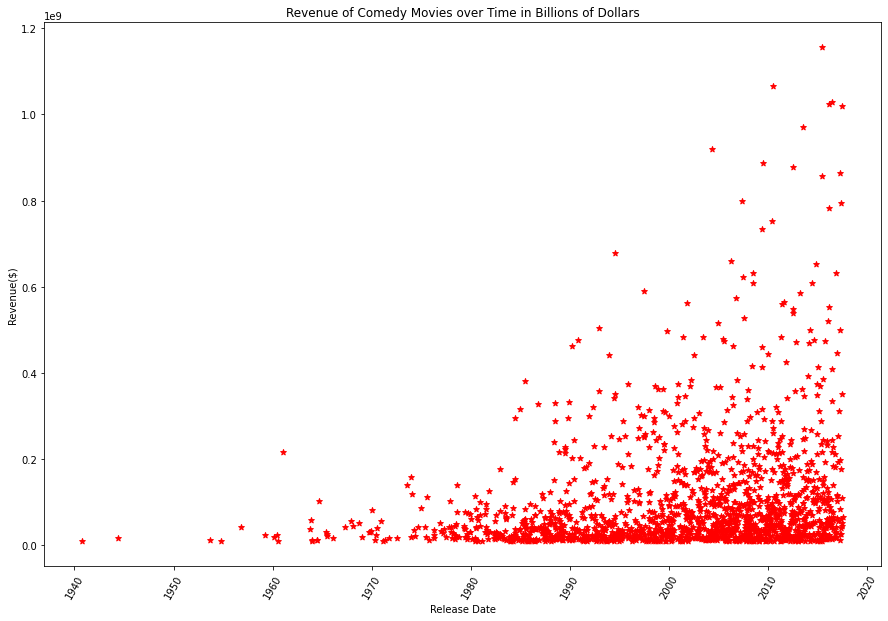

<Figure size 432x288 with 0 Axes>

In [31]:
x = Comedy.release_date
y = Comedy.revenue
color = 'r'
title = 'Revenue of Comedy Movies over Time in Billions of Dollars'
graph_data(x,y,color,title)

This graph shows the revenue generated from comedy movies over time. Two major things to note about this graph is that there is a significant increase in movie generating over a billion dollars in revenue and the distribution trend of the data is much steeper compared to other genres, indicating an increase in popularity.

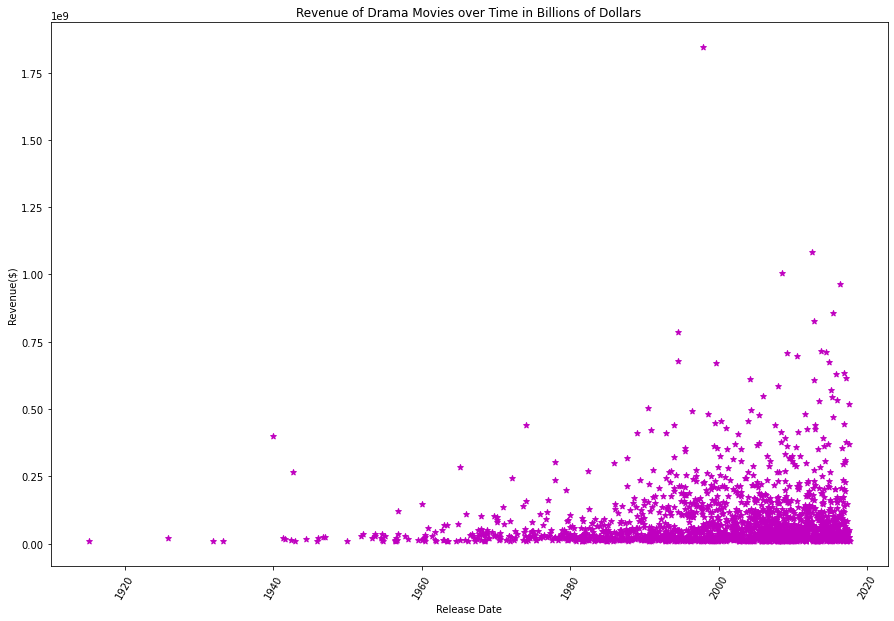

<Figure size 432x288 with 0 Axes>

In [32]:
x = Drama.release_date
y = Drama.revenue
color = 'm'
title = 'Revenue of Drama Movies over Time in Billions of Dollars'
graph_data(x,y,color,title)

This figue shows the revenue over time of Drama movies intthe billions of dollars. One this to note is ther there is some increase in revenue over time however, it is not to the extent of some other genres.

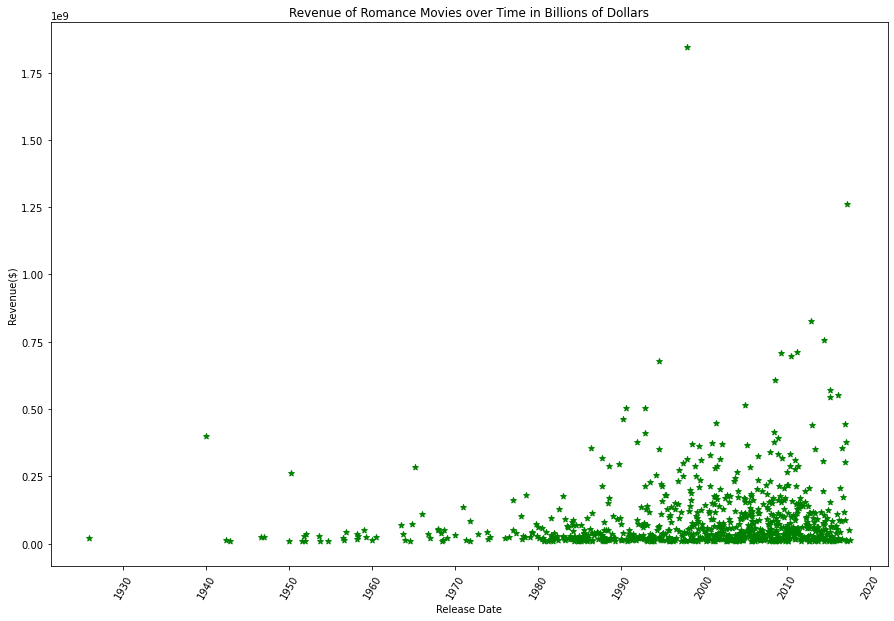

<Figure size 432x288 with 0 Axes>

In [33]:
x = Romance.release_date
y = Romance.revenue
color = 'g'
title = 'Revenue of Romance Movies over Time in Billions of Dollars'
graph_data(x,y,color,title)

This graph shows the revenue generated from Romance movies over time. Note that while there is growth as time has passed most of the revenue over time has stayed relatively flat.

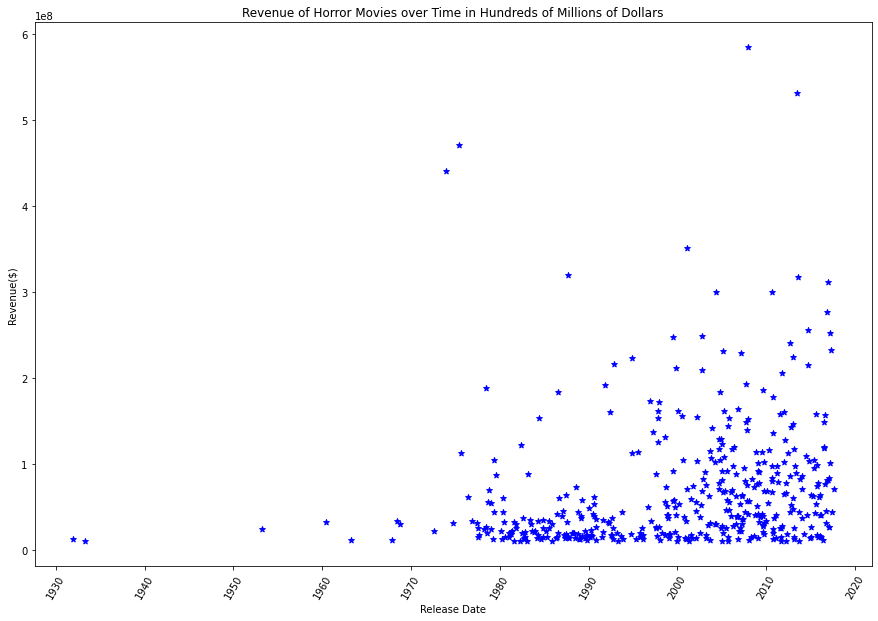

<Figure size 432x288 with 0 Axes>

In [34]:
x = Horror.release_date
y = Horror.revenue
color = 'b'
title = 'Revenue of Horror Movies over Time in Hundreds of Millions of Dollars'
graph_data(x,y,color,title)

This graph shows the revenue of Horror movies over time. Note that these movies have not grossed over a billion dollars on their own.

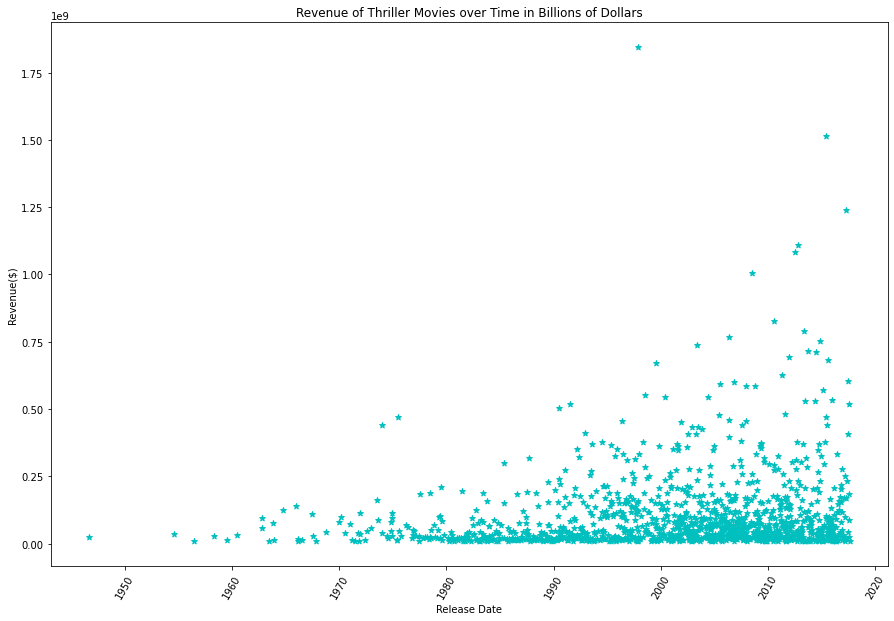

<Figure size 432x288 with 0 Axes>

In [35]:
x = Thriller.release_date
y = Thriller.revenue
color = 'c'
title = 'Revenue of Thriller Movies over Time in Billions of Dollars'
graph_data(x,y,color,title)

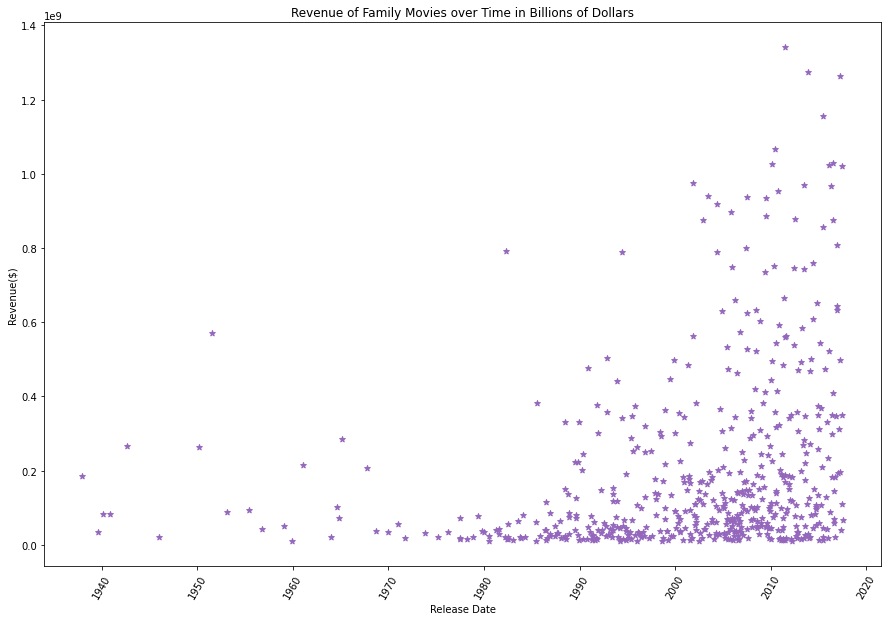

<Figure size 432x288 with 0 Axes>

In [36]:
x = Family.release_date
y = Family.revenue
color = 'tab:purple'
title = 'Revenue of Family Movies over Time in Billions of Dollars'
graph_data(x,y,color,title)

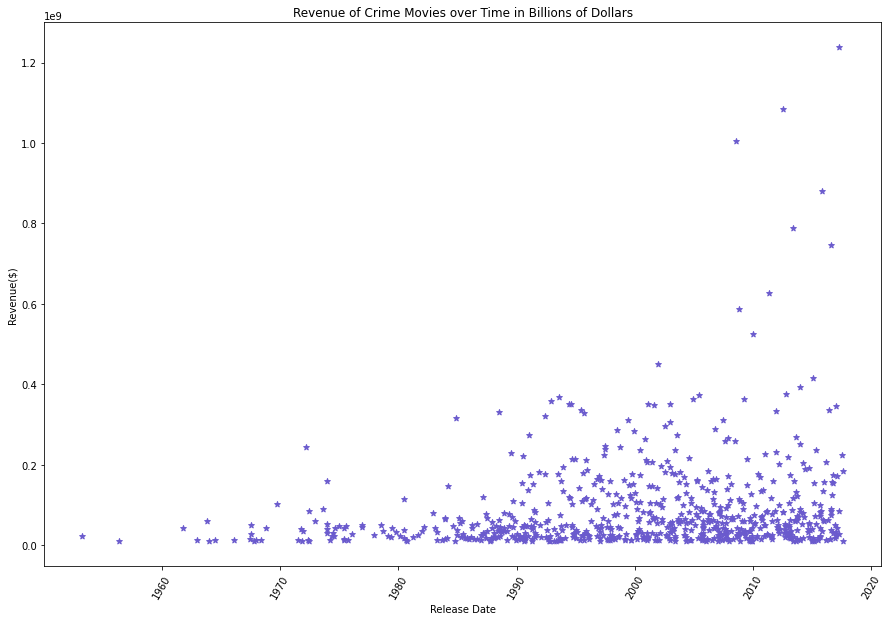

<Figure size 432x288 with 0 Axes>

In [37]:
x = Crime.release_date
y = Crime.revenue
color = 'slateblue'
title = 'Revenue of Crime Movies over Time in Billions of Dollars'
graph_data(x,y,color,title)

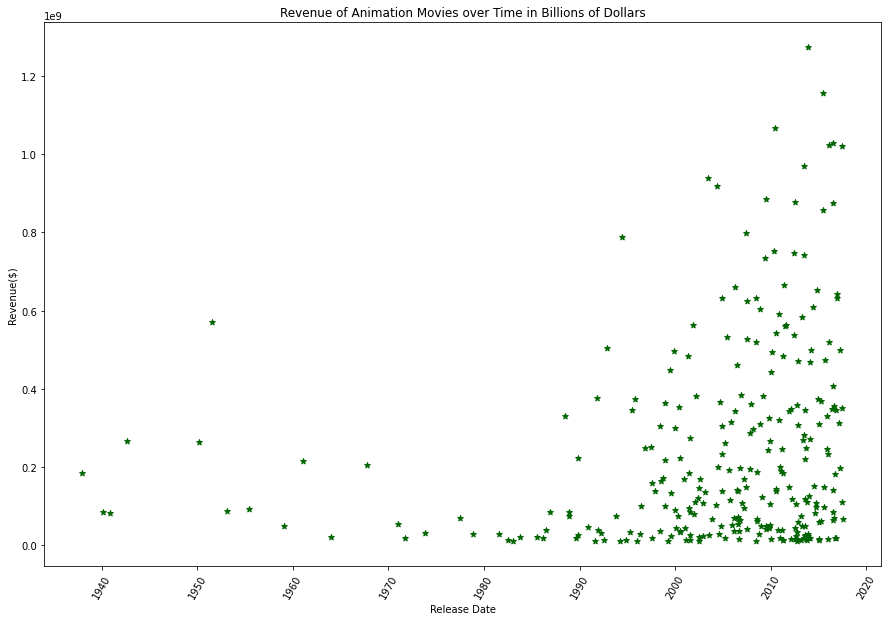

<Figure size 432x288 with 0 Axes>

In [38]:
x = Animation.release_date
y = Animation.revenue
color = 'darkgreen'
title = 'Revenue of Animation Movies over Time in Billions of Dollars'
graph_data(x,y,color,title)

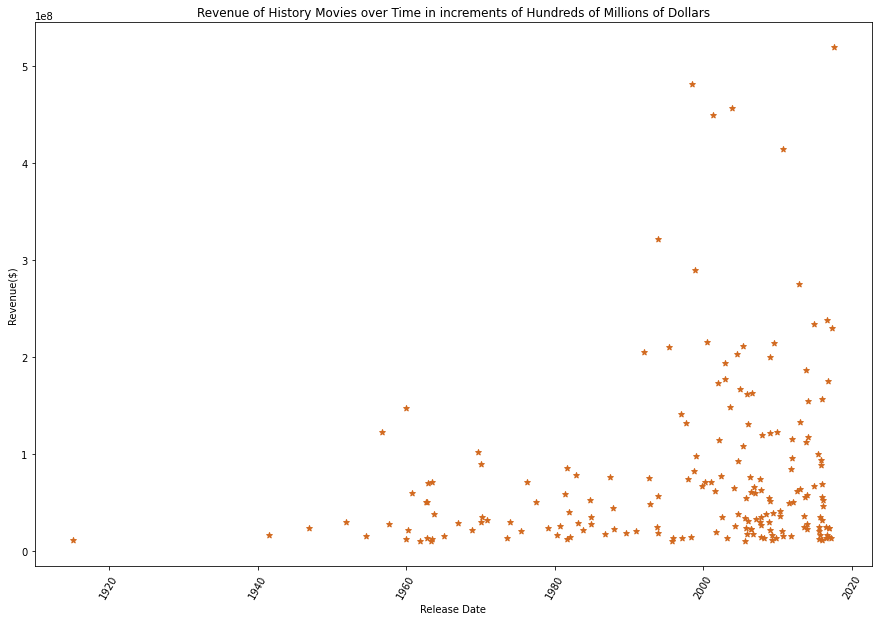

<Figure size 432x288 with 0 Axes>

In [39]:
x = History.release_date
y = History.revenue
color = 'chocolate'
title = 'Revenue of History Movies over Time in increments of Hundreds of Millions of Dollars'
graph_data(x,y,color,title)

When looking at these graphs, There are a few genres that stand out as great draws for audiences.  The Action, Crime, Comedy, Family and Animated genres have shown increased revenue over time and have had many films gross in the billions of dollars. On the other hand, the genres of History, Romance, and Horror, have not had a movie bring in revenue over a billion dollars and show relative stagnation of growth over time when compared to the other genres listed above. History in particular shows a very flat distribution of data points indicating a lack of excitement from audience.


## Conclusion

In conclusion, my recommendation to my colleague, Zoe, would be that we schedule more movies in the genres of Action, Crime, Family and Animation.  While these genres are not traditionally the highest rated as shown in my table above, they will bring mor people into the theater. This is due to the increase of revenue over time and the greater interest from the general-public.


#### Post Note:

There are a couple items that I would like to improve uppon after completion of this assignment.

1. I would like to dissect the ratings of movies and bias of the reviewers.  I mentioned this briefly but the ten highest grossing movies received very poor reviews including Frozen which received less than a two-star rating on average dispite winning the oscar for best animated film.
2. I would also like to do an analysis on the profitability of certain genres over others.  I was not able to take into account the budget of the movies and would be fascinated if there were any correlation between the genres and the profitability of a movie.